## TD 3
### Corally Ngov (2392143) et Lina Sadat (2378349)
---


### 1) i)

#### Variables d'etats: CA, CB, CC, T
#### Variables d'entrees: Fin, Tin, CAin

### ii)

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.integrate import solve_ivp

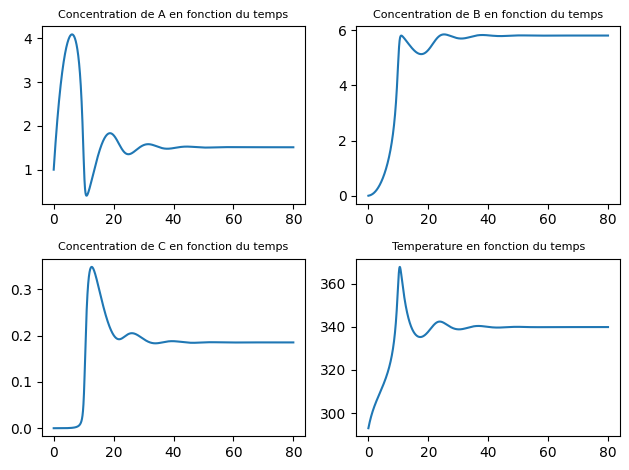

In [37]:

def bilans(t, x, p, u):
    [CA, CB, CC, T] = x #Variables d'etat
    [F, CAin, Tin, V, Hr1, Hr2, Cp, UA, Tc, rho] = p #parametres
    #Eq. diff
    k1 = 2.53 * 10**9 *np.exp (-7500 / T)
    k2 = 7.34 * 10**9 * np.exp(-9500 / T)
    dCA = (F / V) * (CAin - CA) - k1 * CA
    dCB = -(F / V) * CB + k1 * CA - k2 * CB
    dCC = -(F / V) * CC + k2 * CB
    dT = (F / V) * (Tin - T) + (1 / (rho * Cp)) * (- k1 * CA * Hr1 - k2 * CB * Hr2) - (UA * (T - Tc)) / (rho * V * Cp)
    return(dCA, dCB, dCC, dT)
    
#Conditions initiales
x0 = [1, 0, 0, 293]
p = [10.0, 7.5, 293, 60, -71.9, 33.1, 4.18, 85, 313, 1.0]
t_sim = [0, 80]
u0 = []

sim = solve_ivp(bilans, t_sim, x0, method = 'RK45', args = (p, u0), max_step = 0.01)

#Graphiques
fig, axs = plt.subplots(nrows = 2, ncols =2)
CA, CB, CC, T = sim.y

#Graph1
axs[0,0].plot(sim.t, CA)
axs[0,0].set_title('Concentration de A en fonction du temps', fontsize = 8)

#Graph2
axs[0,1].plot(sim.t, CB)
axs[0,1].set_title('Concentration de B en fonction du temps', fontsize = 8)

#Graph3
axs[1,0].plot(sim.t, CC)
axs[1,0].set_title('Concentration de C en fonction du temps', fontsize = 8)

#Graph4
axs[1,1].plot(sim.t, T)
axs[1,1].set_title('Temperature en fonction du temps', fontsize = 8)

plt.tight_layout()
plt.show()

